In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Neeladri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
d=pd.read_csv('competiton-diuresis-train.csv')

In [3]:
d.shape

(10714, 8)

In [4]:
d.columns.values

array(['people_ID', '20-Mar-20', '21-Mar-20', '22-Mar-20', '23-Mar-20',
       '24-Mar-20', '25-Mar-20', '26-Mar-20'], dtype=object)

In [5]:
d.shape

(10714, 8)

In [6]:
d.isnull().sum()

people_ID    0
20-Mar-20    0
21-Mar-20    0
22-Mar-20    0
23-Mar-20    0
24-Mar-20    0
25-Mar-20    0
26-Mar-20    0
dtype: int64

In [7]:
d['20-Mar-20']=d['20-Mar-20'].astype(str).str.replace(",", "")
d['21-Mar-20']=d['21-Mar-20'].astype(str).str.replace(",", "")
d['22-Mar-20']=d['22-Mar-20'].astype(str).str.replace(",", "")
d['23-Mar-20']=d['23-Mar-20'].astype(str).str.replace(",", "")
d['24-Mar-20']=d['24-Mar-20'].astype(str).str.replace(",", "")
d['25-Mar-20']=d['25-Mar-20'].astype(str).str.replace(",", "")
d['26-Mar-20']=d['26-Mar-20'].astype(str).str.replace(",", "")

In [8]:
d

,people_ID,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20
0,1,441,544,670,821,1002,1216,1473
1,2,151,197,253,322,400,493,607
2,3,416,515,632,777,948,1150,1396
3,4,410,506,621,762,928,1127,1368
4,5,390,483,595,730,893,1084,1316
...,...,...,...,...,...,...,...,...
10709,22691,134,174,225,288,359,444,549
10710,22692,387,479,592,725,885,1075,1303
10711,22693,177,228,288,362,448,551,677
10712,22694,352,438,543,666,815,991,1204


In [9]:
X1=d.drop(['people_ID','20-Mar-20'],axis=1).to_numpy()
X=d.drop(['people_ID','26-Mar-20'],axis=1).to_numpy()
y=d['26-Mar-20'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(6,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

Using TensorFlow backend.


In [12]:
model.fit(X_train, y_train, epochs=400, verbose=0)

In [13]:
X1.shape

(10714, 6)

In [14]:
x_input = np.array(X1)
x_input = x_input.reshape((10714,6,1))
yhat = model.predict(x_input, verbose=0)

In [15]:
yhat.shape

(10714, 1)

In [16]:
train=pd.DataFrame(yhat,columns=['Diuresis'])

In [17]:
train.shape

(10714, 1)

In [18]:
i=1
arr=[]
while i<10715:
    arr.append(i)
    i=i+1


In [109]:
train['ID']=arr

In [110]:
cols=['ID','Diuresis']
train=train[cols]

In [111]:
data=d_train=pd.read_csv('competition-train.csv')

In [112]:
data.columns.values

array(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month', 'Infect_Prob'],
      dtype=object)

In [113]:
data_final=data.drop(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month'],axis=1)

In [114]:
data_final.head()

,Diuresis,Infect_Prob
0,441.0,49.135010
1,NaN,51.147880
2,416.0,73.224000
3,410.0,48.779225
4,390.0,87.868800


In [115]:
train['Infect_Prob']=data_final['Infect_Prob']

In [116]:
train

,ID,Diuresis,Infect_Prob
0,1,1787.428223,49.135010
1,2,743.657898,51.147880
2,3,1693.341064,73.224000
3,4,1659.927856,48.779225
4,5,1596.646240,87.868800
...,...,...,...
10709,10710,673.654724,41.981760
10710,10711,1582.514648,47.148663
10711,10712,827.334351,47.708533
10712,10713,1461.366699,53.803565


In [117]:
train['First']=np.NaN

In [118]:
train['First']=train['First'].map({np.NaN: 1})

In [119]:
train.head()

,ID,Diuresis,Infect_Prob,First
0,1,1787.428223,49.135010,1
1,2,743.657898,51.147880,1
2,3,1693.341064,73.224000,1
3,4,1659.927856,48.779225,1
4,5,1596.646240,87.868800,1


In [120]:
train.replace([np.inf, -np.inf], np.nan)

,ID,Diuresis,Infect_Prob,First
0,1,1787.428223,49.135010,1
1,2,743.657898,51.147880,1
2,3,1693.341064,73.224000,1
3,4,1659.927856,48.779225,1
4,5,1596.646240,87.868800,1
...,...,...,...,...
10709,10710,673.654724,41.981760,1
10710,10711,1582.514648,47.148663,1
10711,10712,827.334351,47.708533,1
10712,10713,1461.366699,53.803565,1


In [121]:
train=train.dropna()

In [122]:
cols=['ID','First','Diuresis','Infect_Prob']

In [123]:
train = train[cols]

In [124]:
train.shape

(10714, 4)

In [125]:
train.describe()

,ID,First,Diuresis,Infect_Prob
count,10714.000000,10714.0,10714.000000,10714.000000
mean,5357.500000,1.0,1193.747437,52.280680
std,3093.009726,0.0,352.203827,10.674667
min,1.000000,1.0,577.380188,29.289600
25%,2679.250000,1.0,890.335663,47.277426
50%,5357.500000,1.0,1183.846619,49.008389
75%,8035.750000,1.0,1500.120819,52.762313
max,10714.000000,1.0,1821.851562,97.632000


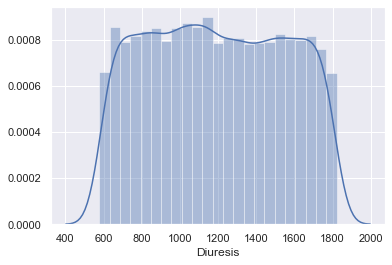

In [126]:
sns.distplot(train['Diuresis'])

In [148]:
from sklearn.model_selection import train_test_split
X=train.drop(['Infect_Prob','ID'],axis=1)
y=train['Infect_Prob']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [149]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [150]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
y_pred=reg.predict(X_test)

In [152]:
y_pred

array([52.10846038, 52.30290123, 52.2547347 , ..., 52.12227859,
       52.22781279, 52.10619073])

In [153]:
from sklearn.metrics import mean_absolute_error
u=mean_absolute_error(y_test,y_pred)
u

6.996895264018355

In [164]:
data_test=pd.read_csv('competition-test.csv')
data_test.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


In [165]:
data_test.columns.values

array(['people_ID', 'Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month'], dtype=object)

In [166]:
data_test=data_test.drop(['Region', 'Gender', 'Designation', 'Name', 'Married',
       'Children', 'Occupation', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Platelets', 'HBB',
       'd-dimer', 'Heart rate', 'HDL cholesterol', 'Charlson Index',
       'Blood Glucose', 'Insurance', 'salary', 'FT/month'],axis=1)

In [167]:
data_test.isnull().sum()

people_ID    0
Diuresis     0
dtype: int64

In [168]:
data_test['First']=np.NaN
data_test['First']=data_test['First'].map({np.NaN: 1})

In [169]:
cols=['people_ID','First','Diuresis']
data_test=data_test[cols]

In [170]:
X=data_test.drop('people_ID',axis=1)

In [171]:
y_pred=reg.predict(X)

In [172]:
y_pred.shape

(14498,)

In [173]:
data_test['Infect_Prob']=y_pred

In [174]:
data_test.describe()

,people_ID,First,Diuresis,Infect_Prob
count,14498.000000,14498.0,14498.000000,14498.000000
mean,14469.963167,1.0,280.657608,72.624001
std,6826.922260,0.0,98.240677,7.138203
min,3887.000000,1.0,110.000000,60.223957
25%,7747.250000,1.0,195.000000,66.400088
50%,16467.500000,1.0,280.000000,72.576219
75%,20315.750000,1.0,366.000000,78.825010
max,25212.000000,1.0,450.000000,84.928481


In [175]:
data_test

,people_ID,First,Diuresis,Infect_Prob
0,5942,1,388,80.423538
1,18664,1,409,81.949406
2,5603,1,440,84.201877
3,5649,1,206,67.199352
4,5099,1,229,68.870540
...,...,...,...,...
14493,23737,1,417,82.530689
14494,11171,1,199,66.690729
14495,23243,1,161,63.929635
14496,11199,1,174,64.874220


In [176]:
data_test=data_test.drop(['First','Diuresis'],axis=1)

In [177]:
data_test.head()

,people_ID,Infect_Prob
0,5942,80.423538
1,18664,81.949406
2,5603,84.201877
3,5649,67.199352
4,5099,68.870540


In [178]:
data_test.to_csv("flipr_ML_Solution_2.csv")